# Project name: Computer Vision and Semantic Analysis


In [1]:
#pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
#pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
#pip install opencv-contrib-python --upgrade

Requirement already up-to-date: opencv-contrib-python in c:\users\axk_l\anaconda3\lib\site-packages (4.5.5.64)
Note: you may need to restart the kernel to use updated packages.


In [124]:
#pip install tf-nightly

  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tf-estimator-nightly
    Found existing installation: tf-estimator-nightly 2.8.0.dev2021122109
    Uninstalling tf-estimator-nightly-2.8.0.dev2021122109:
      Successfully uninstalled tf-estimator-nightly-2.8.0.dev2021122109
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninstalling flatbuffers-2.0:
      Successfully uninstalled flatbuffers-2.0
Note: you may need to restart the kernel to use updated packages.


ERROR: tensorflow 2.8.0 has requirement tf-estimator-nightly==2.8.0.dev2021122109, but you'll have tf-estimator-nightly 2.10.0.dev2022051408 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\axk_l\\anaconda3\\Lib\\site-packages\\tensorflow\\lite\\experimental\\microfrontend\\python\\ops\\_audio_microfrontend_op.so'
Consider using the `--user` option or check the permissions.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import seaborn as seabornInstance
import cv2
import os
from os import listdir
from os.path import isfile, join
import re
from pathlib import Path
import argparse
import matplotlib.pyplot as plt
import glob
from skimage.filters import gaussian
from skimage import img_as_ubyte
%matplotlib inline
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import optimizers

ImportError: cannot import name 'approx_top_k' from 'tensorflow.python.ops.gen_nn_ops' (C:\Users\axk_l\anaconda3\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras import backend as K


class CancerNet:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        shape = (height, width, depth)
        channelDim = -1

        if K.image_data_format() == "channels_first":
            shape = (depth, height, width)
            channelDim = 1

        model.add(SeparableConv2D(32, (3, 3), padding="same", input_shape=shape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=channelDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        model.add(SeparableConv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=channelDim))
        model.add(SeparableConv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=channelDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        model.add(SeparableConv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=channelDim))
        model.add(SeparableConv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=channelDim))
        model.add(SeparableConv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=channelDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        model.add(Flatten())
        model.add(Dense(256))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model

model = CancerNet()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras import backend as K
from keras.layers.advanced_activations import LeakyReLU

## Loading images from folder
On this part the images will be loaded as an array, this function plt.imread(filepath), returns the array with 3 shapes: MxN for grayscale, MxNx3 RGB, and MxNx$ RGBA images, where M is width and N is height. Once all the files are read,an output is shown with the number of files in each folder and the total numbers of files loaded.

In [4]:
#pip install -U pyo

In [38]:
images_list = []
SIZE = 512

path = "C:\\Users\\axk_l\\Documents\\GitHub\\MachLearn2\\AnimalFace\\BearHead\\*.*"

#first create a stack array of all images
for file in glob.glob(path):
    print(file) # just trop here to see all files names printed
    img = cv2.imread(file, 0)#now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    images_list.append(img)
    
images_list = np.array(images_list)
#Process each slice in the stack
img_number = 1 
for image in range(images_list.shape[0]):
    input_img = images_list[image,:,: ]#Grey images
    smoothed_image = img_as_ubyte(gaussian(input_img, sigma =5, mode='constant', cval=0.0))
    cv2.imwrite("C:/Users/axk_l/Documents/GitHub/MachLearn2/smoothed/BearHead/BearHead"+str(img_number)+".jpg",smoothed_image)
    img_number +=1

C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\BearHead\bearfrontal0001.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\BearHead\bearfrontal0002.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\BearHead\bearfrontal0003.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\BearHead\bearfrontal0004.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\BearHead\bearfrontal0005.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\BearHead\bearfrontal0006.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\BearHead\bearfrontal0007.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\BearHead\bearfrontal0008.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\BearHead\bearfrontal0009.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\BearHead\bearfrontal0010.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\BearHead\bearfrontal0011.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\BearHead\bearfrontal0012.jpg
C:\U

In [40]:
images_list = []
SIZE = 512

path = "C:\\Users\\axk_l\\Documents\\GitHub\\MachLearn2\\AnimalFace\\CatHead\\*.*"

#first create a stack array of all images
for file in glob.glob(path):
    print(file) # just trop here to see all files names printed
    img = cv2.imread(file, 0)#now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    images_list.append(img)
    
images_list = np.array(images_list)
#Process each slice in the stack
img_number = 1 
for image in range(images_list.shape[0]):
    input_img = images_list[image,:,:]#Grey images
    smoothed_image = img_as_ubyte(gaussian(input_img, sigma =5, mode='constant', cval=0.0))
    cv2.imwrite("C:/Users/axk_l/Documents/GitHub/MachLearn2/smoothed/CatHead/CatHead"+str(img_number)+".jpg",smoothed_image)
    img_number +=1
    

C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CatHead\cat000852.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CatHead\cat000908.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CatHead\cat000929.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CatHead\cat000960.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CatHead\cat000967.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CatHead\cat1004a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CatHead\cat1012a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CatHead\cat1013a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CatHead\cat1015a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CatHead\cat1020b.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CatHead\cat1021a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CatHead\cat1022a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CatHead\cat1024a.jpg
C:\Users\axk_l\Docum

In [43]:
images_list = []
SIZE = 512

path = "C:\\Users\\axk_l\\Documents\\GitHub\\MachLearn2\\AnimalFace\\ChickenHead\\*.*"

#first create a stack array of all images
for file in glob.glob(path):
    print(file) # just trop here to see all files names printed
    img = cv2.imread(file, 0)#now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    images_list.append(img)
    
images_list = np.array(images_list)
#Process each slice in the stack
img_number = 1 
for image in range(images_list.shape[0]):
    input_img = images_list[image,:,:]#Grey images
    smoothed_image = img_as_ubyte(gaussian(input_img, sigma =5, mode='constant', cval=0.0))
    cv2.imwrite("C:/Users/axk_l/Documents/GitHub/MachLearn2/smoothed/ChickenHead/ChickenHead"+str(img_number)+".jpg",smoothed_image)
    img_number +=1
    

C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ChickenHead\chickenside0001.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ChickenHead\chickenside0002.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ChickenHead\chickenside0003.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ChickenHead\chickenside0004.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ChickenHead\chickenside0005.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ChickenHead\chickenside0006.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ChickenHead\chickenside0007.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ChickenHead\chickenside0008.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ChickenHead\chickenside0009.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ChickenHead\chickenside0010.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ChickenHead\chickenside0011.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\

In [61]:
images_list = []
SIZE = 512

path = "C:\\Users\\axk_l\\Documents\\GitHub\\MachLearn2\\AnimalFace\\CowHead\\*.*"

#first create a stack array of all images
for file in glob.glob(path):
    print(file) # just trop here to see all files names printed
    img = cv2.imread(file, 0)#now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    images_list.append(img)
    
images_list = np.array(images_list)

#Process each slice in the stack
img_number = 1 
for image in range(images_list.shape[0]):
    input_img = images_list[image,:,:]#Grey images
    smoothed_image = img_as_ubyte(gaussian(input_img, sigma =5, mode='constant', cval=0.0))
    cv2.imwrite("C:/Users/axk_l/Documents/GitHub/MachLearn2/smoothed/CowHead/CowHead"+str(img_number)+".jpg",smoothed_image)
    img_number +=1

C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CowHead\01_05_21---Cow_web.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CowHead\050963A.JPG
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CowHead\1-brown-cow-louise-magno.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CowHead\1846375599_f0190f706a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CowHead\542696674_1a7a164508.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CowHead\73870944qUylUu_fs.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CowHead\A22A0X.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CowHead\brown cow 2.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CowHead\cattlefrontal0001.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CowHead\cattlefrontal0002.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CowHead\cattlefrontal0003.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\CowHead\cattlefrontal0004.jpg
C:\U

In [89]:
images_list = []
SIZE = 512

path = "C:\\Users\\axk_l\\Documents\\GitHub\\MachLearn2\\AnimalFace\\DeerHead\\*.*"

#first create a stack array of all images
for file in glob.glob(path):
    print(file) # just trop here to see all files names printed
    img = cv2.imread(file, 0)#now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    images_list.append(img)
    
images_list = np.array(images_list)

#Process each slice in the stack
img_number = 1 
for image in range(images_list.shape[0]):
    input_img = images_list[image,:,:]#Grey images
    smoothed_image = img_as_ubyte(gaussian(input_img, sigma =5, mode='constant', cval=0.0))
    cv2.imwrite("C:/Users/axk_l/Documents/GitHub/MachLearn2/smoothed/DeerHead/DeerHead"+str(img_number)+".jpg",smoothed_image)
    img_number +=1

C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DeerHead\0000000001.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DeerHead\0000000002.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DeerHead\0000000003.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DeerHead\0000000004.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DeerHead\0000000005.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DeerHead\0000000006.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DeerHead\0000000007.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DeerHead\0000000008.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DeerHead\0000000009.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DeerHead\0000000010.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DeerHead\0000000011.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DeerHead\0000000012.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DeerHead\0

In [90]:
images_list = []
SIZE = 512

path = "C:\\Users\\axk_l\\Documents\\GitHub\\MachLearn2\\AnimalFace\\DogHead\\*.*"

#first create a stack array of all images
for file in glob.glob(path):
    print(file) # just trop here to see all files names printed
    img = cv2.imread(file, 0)#now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    images_list.append(img)
    
images_list = np.array(images_list)

#Process each slice in the stack
img_number = 1 
for image in range(images_list.shape[0]):
    input_img = images_list[image,:,:]#Grey images
    smoothed_image = img_as_ubyte(gaussian(input_img, sigma =5, mode='constant', cval=0.0))
    cv2.imwrite("C:/Users/axk_l/Documents/GitHub/MachLearn2/smoothed/DogHead/DogHead"+str(img_number)+".jpg",smoothed_image)
    img_number +=1

C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000001c.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000002a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000003a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000004a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000006a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000006b.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000012a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000013a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000014a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000018a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000019a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000023a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000024a.jpg

C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000518a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000519a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000519b.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000520a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000525c.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000529a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000530a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000531a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000536a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000539a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000540a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000541a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000542a.jpg

C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000853a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000873a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000885a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000892a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000916a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DogHead\dog000934a.jpg


In [91]:
images_list = []
SIZE = 512

path = "C:\\Users\\axk_l\\Documents\\GitHub\\MachLearn2\\AnimalFace\\DuckHead\\*.*"

#first create a stack array of all images
for file in glob.glob(path):
    print(file) # just trop here to see all files names printed
    img = cv2.imread(file, 0)#now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    images_list.append(img)
    
images_list = np.array(images_list)

#Process each slice in the stack
img_number = 1 
for image in range(images_list.shape[0]):
    input_img = images_list[image,:,:]#Grey images
    smoothed_image = img_as_ubyte(gaussian(input_img, sigma =5, mode='constant', cval=0.0))
    cv2.imwrite("C:/Users/axk_l/Documents/GitHub/MachLearn2/smoothed/DuckHead/DuckHead"+str(img_number)+".jpg",smoothed_image)
    img_number +=1

C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DuckHead\01_08_18---Duck_web.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DuckHead\duck-02.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DuckHead\Duck.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DuckHead\duck5.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DuckHead\ducks1.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DuckHead\ducks2.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DuckHead\ducks3.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DuckHead\duckside0001.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DuckHead\duckside0002.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DuckHead\duckside0003.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DuckHead\duckside0004.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DuckHead\duckside0005.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\DuckHead\duckside

In [92]:
images_list = []
SIZE = 512

path = "C:\\Users\\axk_l\\Documents\\GitHub\\MachLearn2\\AnimalFace\\EagleHead\\*.*"

#first create a stack array of all images
for file in glob.glob(path):
    print(file) # just trop here to see all files names printed
    img = cv2.imread(file, 0)#now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    images_list.append(img)
    
images_list = np.array(images_list)

#Process each slice in the stack
img_number = 1 
for image in range(images_list.shape[0]):
    input_img = images_list[image,:,:]#Grey images
    smoothed_image = img_as_ubyte(gaussian(input_img, sigma =5, mode='constant', cval=0.0))
    cv2.imwrite("C:/Users/axk_l/Documents/GitHub/MachLearn2/smoothed/EagleHead/EagleHead"+str(img_number)+".jpg",smoothed_image)
    img_number +=1

C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\EagleHead\040305-098..jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\EagleHead\06eagle00.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\EagleHead\3169423808_37abc30470.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\EagleHead\3187888843_1ec507fe17.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\EagleHead\320-golden-eagle-c3648.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\EagleHead\3218816697_a707f90e8e.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\EagleHead\3242107126_65347ffea0.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\EagleHead\3419031818_b646e7089d.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\EagleHead\3754929724_dd9b748e59.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\EagleHead\393291573_a11aabb7fd.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\EagleHead\4376095748_cabe4d2596.jpg
C:\Users\axk_l\Documents\GitHub\

In [93]:
images_list = []
SIZE = 512

path = "C:\\Users\\axk_l\\Documents\\GitHub\\MachLearn2\\AnimalFace\\ElephantHead\\*.*"

#first create a stack array of all images
for file in glob.glob(path):
    print(file) # just trop here to see all files names printed
    img = cv2.imread(file, 0)#now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    images_list.append(img)
    
images_list = np.array(images_list)

#Process each slice in the stack
img_number = 1 
for image in range(images_list.shape[0]):
    input_img = images_list[image,:,:]#Grey images
    smoothed_image = img_as_ubyte(gaussian(input_img, sigma =5, mode='constant', cval=0.0))
    cv2.imwrite("C:/Users/axk_l/Documents/GitHub/MachLearn2/smoothed/ElephantHead/ElephantHead"+str(img_number)+".jpg",smoothed_image)
    img_number +=1

C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ElephantHead\0000000001.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ElephantHead\0000000002.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ElephantHead\0000000003.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ElephantHead\0000000004.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ElephantHead\0000000005.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ElephantHead\0000000006.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ElephantHead\0000000007.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ElephantHead\0000000008.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ElephantHead\0000000009.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ElephantHead\0000000010.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ElephantHead\0000000011.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\ElephantHead\0000000012.jpg
C:\Users\axk_l\D

In [94]:
images_list = []
SIZE = 512

path = "C:\\Users\\axk_l\\Documents\\GitHub\\MachLearn2\\AnimalFace\\HumanHead\\*.*"

#first create a stack array of all images
for file in glob.glob(path):
    print(file) # just trop here to see all files names printed
    img = cv2.imread(file, 0)#now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    images_list.append(img)
    
images_list = np.array(images_list)

#Process each slice in the stack
img_number = 1 
for image in range(images_list.shape[0]):
    input_img = images_list[image,:,:]#Grey images
    smoothed_image = img_as_ubyte(gaussian(input_img, sigma =5, mode='constant', cval=0.0))
    cv2.imwrite("C:/Users/axk_l/Documents/GitHub/MachLearn2/smoothed/HumanHead/HumanHead"+str(img_number)+".jpg",smoothed_image)
    img_number +=1

C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\HumanHead\0000000001.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\HumanHead\0000000006.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\HumanHead\0000000008.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\HumanHead\0000000010.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\HumanHead\0000000014.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\HumanHead\0000000015.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\HumanHead\0000000016.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\HumanHead\0000000017.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\HumanHead\0000000019.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\HumanHead\0000000020.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\HumanHead\0000000023.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\HumanHead\0000000024.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFac

In [95]:
images_list = []
SIZE = 512

path = "C:\\Users\\axk_l\\Documents\\GitHub\\MachLearn2\\AnimalFace\\LionHead\\*.*"

#first create a stack array of all images
for file in glob.glob(path):
    print(file) # just trop here to see all files names printed
    img = cv2.imread(file, 0)#now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    images_list.append(img)
    
images_list = np.array(images_list)

#Process each slice in the stack
img_number = 1 
for image in range(images_list.shape[0]):
    input_img = images_list[image,:,:]#Grey images
    smoothed_image = img_as_ubyte(gaussian(input_img, sigma =5, mode='constant', cval=0.0))
    cv2.imwrite("C:/Users/axk_l/Documents/GitHub/MachLearn2/smoothed/LionHead/LionHead"+str(img_number)+".jpg",smoothed_image)
    img_number +=1

C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\LionHead\lion,7y.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\LionHead\lion,i87.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\LionHead\lion,k 78.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\LionHead\lion,ky7u6.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\LionHead\lion,l87o99.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\LionHead\lion,tyr.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\LionHead\lion.l98.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\LionHead\lion007.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\LionHead\lion131.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\LionHead\lion20060925113100644.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\LionHead\lion54.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\LionHead\lion54546.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\LionHead\lion7676.j

In [96]:
images_list = []
SIZE = 512

path = "C:\\Users\\axk_l\\Documents\\GitHub\\MachLearn2\\AnimalFace\\MonkeyHead\\*.*"

#first create a stack array of all images
for file in glob.glob(path):
    print(file) # just trop here to see all files names printed
    img = cv2.imread(file, 0)#now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    images_list.append(img)
    
images_list = np.array(images_list)

#Process each slice in the stack
img_number = 1 
for image in range(images_list.shape[0]):
    input_img = images_list[image,:,:]#Grey images
    smoothed_image = img_as_ubyte(gaussian(input_img, sigma =5, mode='constant', cval=0.0))
    cv2.imwrite("C:/Users/axk_l/Documents/GitHub/MachLearn2/smoothed/MonkeyHead/MonkeyHead"+str(img_number)+".jpg",smoothed_image)
    img_number +=1

C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MonkeyHead\monkeyfrontal0001.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MonkeyHead\monkeyfrontal0002.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MonkeyHead\monkeyfrontal0003.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MonkeyHead\monkeyfrontal0004.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MonkeyHead\monkeyfrontal0005.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MonkeyHead\monkeyfrontal0006.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MonkeyHead\monkeyfrontal0007.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MonkeyHead\monkeyfrontal0008.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MonkeyHead\monkeyfrontal0009.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MonkeyHead\monkeyfrontal0010.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MonkeyHead\monkeyfrontal0011.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\

In [97]:
images_list = []
SIZE = 512

path = "C:\\Users\\axk_l\\Documents\\GitHub\\MachLearn2\\AnimalFace\\MouseHead\\*.*"

#first create a stack array of all images
for file in glob.glob(path):
    print(file) # just trop here to see all files names printed
    img = cv2.imread(file, 0)#now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    images_list.append(img)
    
images_list = np.array(images_list)

#Process each slice in the stack
img_number = 1 
for image in range(images_list.shape[0]):
    input_img = images_list[image,:,:]#Grey images
    smoothed_image = img_as_ubyte(gaussian(input_img, sigma =5, mode='constant', cval=0.0))
    cv2.imwrite("C:/Users/axk_l/Documents/GitHub/MachLearn2/smoothed/MouseHead/MouseHead"+str(img_number)+".jpg",smoothed_image)
    img_number +=1

C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MouseHead\mousefrontal0001.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MouseHead\mousefrontal0002.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MouseHead\mousefrontal0003.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MouseHead\mousefrontal0004.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MouseHead\mousefrontal0005.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MouseHead\mousefrontal0006.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MouseHead\mousefrontal0007.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MouseHead\mousefrontal0008.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MouseHead\mousefrontal0009.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MouseHead\mousefrontal0010.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MouseHead\mousefrontal0011.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\MouseHead\m

In [98]:
images_list = []
SIZE = 512

path = "C:\\Users\\axk_l\\Documents\\GitHub\\MachLearn2\\AnimalFace\\Natural\\*.*"

#first create a stack array of all images
for file in glob.glob(path):
    print(file) # just trop here to see all files names printed
    img = cv2.imread(file, 0)#now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    images_list.append(img)
    
images_list = np.array(images_list)

#Process each slice in the stack
img_number = 1 
for image in range(images_list.shape[0]):
    input_img = images_list[image,:,:]#Grey images
    smoothed_image = img_as_ubyte(gaussian(input_img, sigma =5, mode='constant', cval=0.0))
    cv2.imwrite("C:/Users/axk_l/Documents/GitHub/MachLearn2/smoothed/Natural/Natural"+str(img_number)+".jpg",smoothed_image)
    img_number +=1

C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\Natural\001004.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\Natural\001015.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\Natural\002_office.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\Natural\1.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\Natural\image_0022.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\Natural\mountain1.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\Natural\stream and pine bushes.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\Natural\sunset1.jpg


In [99]:
images_list = []
SIZE = 512

path = "C:\\Users\\axk_l\\Documents\\GitHub\\MachLearn2\\AnimalFace\\PandaHead\\*.*"

#first create a stack array of all images
for file in glob.glob(path):
    print(file) # just trop here to see all files names printed
    img = cv2.imread(file, 0)#now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    images_list.append(img)
    
images_list = np.array(images_list)

#Process each slice in the stack
img_number = 1 
for image in range(images_list.shape[0]):
    input_img = images_list[image,:,:]#Grey images
    smoothed_image = img_as_ubyte(gaussian(input_img, sigma =5, mode='constant', cval=0.0))
    cv2.imwrite("C:/Users/axk_l/Documents/GitHub/MachLearn2/smoothed/PandaHead/PandaHead"+str(img_number)+".jpg",smoothed_image)
    img_number +=1

C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\PandaHead\20080310_panda.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\PandaHead\29tlab_panda.480.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\PandaHead\4562382757_b6296c3351.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\PandaHead\4562384687_477a9fd447.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\PandaHead\4562385069_5fc85a4d25.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\PandaHead\4562385399_98b9bba1ab.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\PandaHead\4562387141_249c388e6e.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\PandaHead\4562397977_1c1ba77716.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\PandaHead\4562404531_63f12018e0.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\PandaHead\4562730849_07d327d517.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\PandaHead\4563013112_67062bc46e.jpg
C:\Users\axk_l\Documen

In [100]:
images_list = []
SIZE = 512

path = "C:\\Users\\axk_l\\Documents\\GitHub\\MachLearn2\\AnimalFace\\PigeonHead\\*.*"

#first create a stack array of all images
for file in glob.glob(path):
    print(file) # just trop here to see all files names printed
    img = cv2.imread(file, 0)#now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    images_list.append(img)
    
images_list = np.array(images_list)

#Process each slice in the stack
img_number = 1 
for image in range(images_list.shape[0]):
    input_img = images_list[image,:,:]#Grey images
    smoothed_image = img_as_ubyte(gaussian(input_img, sigma =5, mode='constant', cval=0.0))
    cv2.imwrite("C:/Users/axk_l/Documents/GitHub/MachLearn2/smoothed/PigeonHead/PigeonHead"+str(img_number)+".jpg",smoothed_image)
    img_number +=1

C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\PigeonHead\01_37_52---Pigeon_web.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\PigeonHead\2006-09pigeon.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\PigeonHead\2008-09-23 025 white pigeon.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\PigeonHead\2009 Mar 27 158a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\PigeonHead\2009-06-16 016 pigeon tiptoe (2).jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\PigeonHead\2009-06-16 016 pigeon tiptoe.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\PigeonHead\2009-06-16 017 pigeon 2.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\PigeonHead\2009-06-16 019 pegeon 3.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\PigeonHead\2009-08-15 023 at the peak of life pigeon.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\PigeonHead\7-scaly-naped_pigeon.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\Pi

In [101]:
images_list = []
SIZE = 512

path = "C:\\Users\\axk_l\\Documents\\GitHub\\MachLearn2\\AnimalFace\\RabbitHead\\*.*"

#first create a stack array of all images
for file in glob.glob(path):
    print(file) # just trop here to see all files names printed
    img = cv2.imread(file, 0)#now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    images_list.append(img)
    
images_list = np.array(images_list)

#Process each slice in the stack
img_number = 1 
for image in range(images_list.shape[0]):
    input_img = images_list[image,:,:]#Grey images
    smoothed_image = img_as_ubyte(gaussian(input_img, sigma =5, mode='constant', cval=0.0))
    cv2.imwrite("C:/Users/axk_l/Documents/GitHub/MachLearn2/smoothed/RabbitHead/RabbitHead"+str(img_number)+".jpg",smoothed_image)
    img_number +=1

C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\RabbitHead\rabbitfrontalfrontal0001.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\RabbitHead\rabbitfrontalfrontal0002.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\RabbitHead\rabbitfrontalfrontal0003.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\RabbitHead\rabbitfrontalfrontal0004.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\RabbitHead\rabbitfrontalfrontal0005.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\RabbitHead\rabbitfrontalfrontal0006.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\RabbitHead\rabbitfrontalfrontal0007.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\RabbitHead\rabbitfrontalfrontal0008.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\RabbitHead\rabbitfrontalfrontal0009.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\RabbitHead\rabbitfrontalfrontal0010.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\Rabbit

In [102]:
images_list = []
SIZE = 512

path = "C:\\Users\\axk_l\\Documents\\GitHub\\MachLearn2\\AnimalFace\\SheepHead\\*.*"

#first create a stack array of all images
for file in glob.glob(path):
    print(file) # just trop here to see all files names printed
    img = cv2.imread(file, 0)#now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    images_list.append(img)
    
images_list = np.array(images_list)

#Process each slice in the stack
img_number = 1 
for image in range(images_list.shape[0]):
    input_img = images_list[image,:,:]#Grey images
    smoothed_image = img_as_ubyte(gaussian(input_img, sigma =5, mode='constant', cval=0.0))
    cv2.imwrite("C:/Users/axk_l/Documents/GitHub/MachLearn2/smoothed/SheepHead/SheepHead"+str(img_number)+".jpg",smoothed_image)
    img_number +=1

C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\SheepHead\sheepfrontal0001.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\SheepHead\sheepfrontal0002.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\SheepHead\sheepfrontal0003.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\SheepHead\sheepfrontal0004.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\SheepHead\sheepfrontal0005.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\SheepHead\sheepfrontal0006.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\SheepHead\sheepfrontal0007.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\SheepHead\sheepfrontal0008.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\SheepHead\sheepfrontal0009.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\SheepHead\sheepfrontal0010.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\SheepHead\sheepfrontal0011.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\SheepHead\s

In [103]:
images_list = []
SIZE = 512

path = "C:\\Users\\axk_l\\Documents\\GitHub\\MachLearn2\\AnimalFace\\TigerHead\\*.*"

#first create a stack array of all images
for file in glob.glob(path):
    print(file) # just trop here to see all files names printed
    img = cv2.imread(file, 0)#now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    images_list.append(img)
    
images_list = np.array(images_list)

#Process each slice in the stack
img_number = 1 
for image in range(images_list.shape[0]):
    input_img = images_list[image,:,:]#Grey images
    smoothed_image = img_as_ubyte(gaussian(input_img, sigma =5, mode='constant', cval=0.0))
    cv2.imwrite("C:/Users/axk_l/Documents/GitHub/MachLearn2/smoothed/TigerHead/TigerHead"+str(img_number)+".jpg",smoothed_image)
    img_number +=1

C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\TigerHead\1235_white-baby-tiger.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\TigerHead\2_tigers.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\TigerHead\Bengal_Tiger.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\TigerHead\bengal_tiger_31.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\TigerHead\indochinese-tiger-eaten.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\TigerHead\lying-tiger-1a.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\TigerHead\me-and-a-tiger-2007.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\TigerHead\ron-kimball-white-tiger-sitting.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\TigerHead\siberian-tiger-grooming.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\TigerHead\Siberian-Tiger.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\TigerHead\siberian_tiger.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\Anim

In [104]:
images_list = []
SIZE = 512

path = "C:\\Users\\axk_l\\Documents\\GitHub\\MachLearn2\\AnimalFace\\WolfHead\\*.*"

#first create a stack array of all images
for file in glob.glob(path):
    print(file) # just trop here to see all files names printed
    img = cv2.imread(file, 0)#now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    images_list.append(img)
    
images_list = np.array(images_list)

#Process each slice in the stack
img_number = 1 
for image in range(images_list.shape[0]):
    input_img = images_list[image,:,:]#Grey images
    smoothed_image = img_as_ubyte(gaussian(input_img, sigma =5, mode='constant', cval=0.0))
    cv2.imwrite("C:/Users/axk_l/Documents/GitHub/MachLearn2/smoothed/WolfHead/WolfHead"+str(img_number)+".jpg",smoothed_image)
    img_number +=1

C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\WolfHead\wolffrontal0001.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\WolfHead\wolffrontal0002.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\WolfHead\wolffrontal0003.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\WolfHead\wolffrontal0004.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\WolfHead\wolffrontal0005.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\WolfHead\wolffrontal0006.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\WolfHead\wolffrontal0007.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\WolfHead\wolffrontal0008.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\WolfHead\wolffrontal0009.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\WolfHead\wolffrontal0010.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\WolfHead\wolffrontal0011.jpg
C:\Users\axk_l\Documents\GitHub\MachLearn2\AnimalFace\WolfHead\wolffrontal0012.jpg
C:\U

In [2]:
dirname = os.path.join(os.getcwd(), 'smoothed')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
quant=0

print("Reading images ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            quant=quant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Reading" + str(quant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, quant)
                prevRoot=root
                directories.append(root)
                dircount.append(quant)
                quant=0
dircount.append(quant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Files read:',len(directories))
print("Number of images found", dircount)
print('Total images:',sum(dircount))

Reading images  C:\Users\axk_l\Documents\GitHub\MachLearn2\smoothed\
C:\Users\axk_l\Documents\GitHub\MachLearn2\smoothed\BearHead 1
C:\Users\axk_l\Documents\GitHub\MachLearn2\smoothed\CatHead 101
C:\Users\axk_l\Documents\GitHub\MachLearn2\smoothed\ChickenHead 160
C:\Users\axk_l\Documents\GitHub\MachLearn2\smoothed\CowHead 100
C:\Users\axk_l\Documents\GitHub\MachLearn2\smoothed\DeerHead 103
C:\Users\axk_l\Documents\GitHub\MachLearn2\smoothed\DogHead 103
C:\Users\axk_l\Documents\GitHub\MachLearn2\smoothed\DuckHead 389
C:\Users\axk_l\Documents\GitHub\MachLearn2\smoothed\EagleHead 103
C:\Users\axk_l\Documents\GitHub\MachLearn2\smoothed\ElephantHead 101
C:\Users\axk_l\Documents\GitHub\MachLearn2\smoothed\HumanHead 100
C:\Users\axk_l\Documents\GitHub\MachLearn2\smoothed\LionHead 100
C:\Users\axk_l\Documents\GitHub\MachLearn2\smoothed\MonkeyHead 102
C:\Users\axk_l\Documents\GitHub\MachLearn2\smoothed\MouseHead 100
C:\Users\axk_l\Documents\GitHub\MachLearn2\smoothed\Natural 100
C:\Users\axk_l\

## Creatin labels
Because a supervised algorithm will be used, a value is assigned to each animal folder when creating labels. This is important to indicate any time a picture is submitted on a specific animal, so the algorithm knows which label is the correct one.

In [3]:
labels=[]
index=0
for quantity in dircount:
    for i in range(quantity):
        labels.append(index)
    index=index+1
print("Labels created: ",len(labels))

Labels created:  2317


In [4]:
animals=[]
index=0
for directory in directories:
    name = directory.split(os.sep)
    print(index , name[len(name)-1])
    animals.append(name[len(name)-1])
    index=index+1

0 BearHead
1 CatHead
2 ChickenHead
3 CowHead
4 DeerHead
5 DogHead
6 DuckHead
7 EagleHead
8 ElephantHead
9 HumanHead
10 LionHead
11 MonkeyHead
12 MouseHead
13 Natural
14 PandaHead
15 PigeonHead
16 RabbitHead
17 SheepHead
18 TigerHead
19 WolfHead


After labelling all the information, the input layer, hidden layer, and output layer, the connection weights will be adjusted to help resolve the differences between actual and predicted outcomes. (Mayo, 2017). The weights are adjusted to reconcile the difference between actual and predicted results. The errors are useful since they are given back to each neuron to update, resulting in backpropagation of error. It would be absurd to not balance and alter a huge number of weights while dealing with a neural network with numerous layers of neurons to make accurate predictions. After that the a class is created according the number of lables with numpy array, np.array()

In [5]:
y = np.array(labels)
#X = np.array(images, dtype=object)
#X = np.array(images, dtype=np.float64)
X = np.array(images, dtype=np.uint8)

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  20
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


## Creating test and training dataset
For the test dataset the 20 percent of the original dataset, and 80 percent for the training. 

In [8]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

NameError: name 'train_test_split' is not defined

NameError: name 'train_X' is not defined

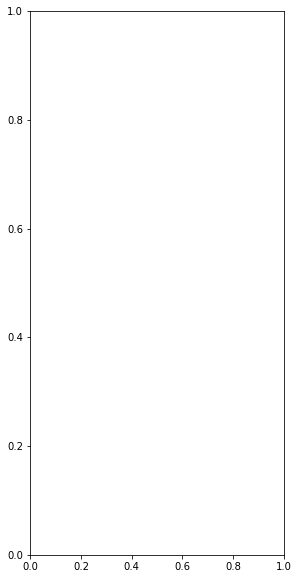

In [7]:
plt.figure(figsize=[10,10])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

To prepocess the pixels are being dived by 255

In [114]:
train_X = train_X.astype('object')
test_X = test_X.astype('object')
train_X = train_X / 255.
test_X = test_X / 255.


## One hot encoding
As pre-processing data is one of the main steps before modelling, is necessary to clean and format the data, making suitable doe machine learning algorithms. Many machine learning algorithms are unable to work with categorical data therefore, they must be converted into numbers. One hot encoding is used to convert categorical data into a format that can be read by machine learning algorithms, this is done by creating new variables with 0 and 1 as values, this improves predictions and classification accuracy of a model. (Dey, 2021) In the case of this project what the one hot encoding is doing is converting the labels, that are now classes, inot 0 and 1, as an example 5 is DogsHead so after the encoding will be (0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0)

In [115]:
 
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
 
# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])
 
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
 
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

Original label: 17
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(1482, 512, 512) (371, 512, 512) (1482, 20) (371, 20)


In [116]:
animalface_model = Sequential()
animalface_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
animalface_model.add(LeakyReLU(alpha=0.1))
animalface_model.add(MaxPooling2D((2, 2),padding='same'))
animalface_model.add(Dropout(0.5))

animalface_model.add(Flatten())
animalface_model.add(Dense(32, activation='linear'))
animalface_model.add(LeakyReLU(alpha=0.1))
animalface_model.add(Dropout(0.5))
animalface_model.add(Dense(nClasses, activation='softmax'))

In [123]:
animalface_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 21, 28, 32)        896       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 21, 28, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 11, 14, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 4928)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                157728    
                                                      

In [128]:
animalface_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.experimental.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

AttributeError: module 'keras.optimizers' has no attribute 'experimental'

## Entrenando al modelo